In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data/credit_data.csv')
data.head(2)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                50636 non-null  int64 
 1   gender             50636 non-null  object
 2   education          50636 non-null  object
 3   occupation         50636 non-null  object
 4   organization_type  50636 non-null  object
 5   seniority          50636 non-null  object
 6   annual_income      50636 non-null  int64 
 7   disposable_income  50636 non-null  int64 
 8   house_type         50636 non-null  object
 9   vehicle_type       50636 non-null  object
 10  marital_status     50636 non-null  object
 11  no_card            50636 non-null  int64 
 12  default            50636 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


In [4]:
data.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


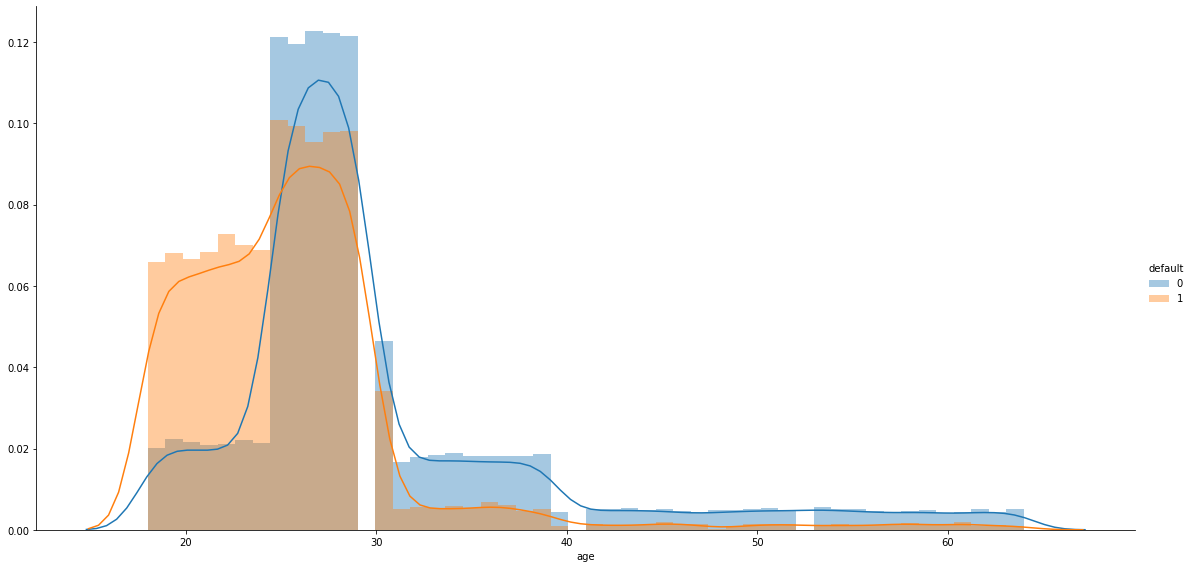

In [5]:
sns.FacetGrid(data, hue="default",height=8,aspect=2).map(sns.distplot, "age").add_legend()

In [6]:
age = data['age'].value_counts()
print("AGE     : Number of points where age = AGE")
for i in range(len(age)):
    print(age.index[i],"\t:",age.values[i])

AGE     : Number of points where age = AGE
##########################################
28 	: 5514
27 	: 5512
25 	: 5502
29 	: 5491
26 	: 5423
30 	: 2073
23 	: 1383
19 	: 1374
22 	: 1360
24 	: 1349
20 	: 1336
21 	: 1325
18 	: 1279
34 	: 780
39 	: 764
33 	: 761
36 	: 758
37 	: 757
35 	: 750
38 	: 745
32 	: 745
31 	: 690
53 	: 229
43 	: 220
45 	: 217
51 	: 216
41 	: 210
54 	: 209
50 	: 207
55 	: 206
64 	: 205
42 	: 204
44 	: 202
62 	: 202
52 	: 199
59 	: 199
49 	: 197
58 	: 196
56 	: 194
46 	: 189
48 	: 188
61 	: 188
57 	: 184
63 	: 181
40 	: 178
47 	: 174
60 	: 171


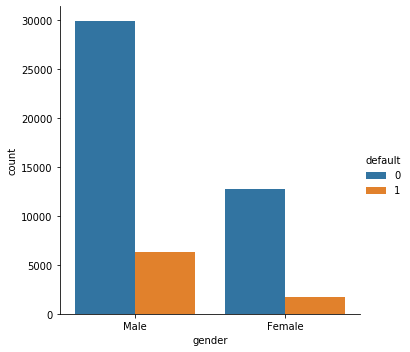

In [7]:
sns.catplot(x="gender",hue="default", kind="count", data=data)

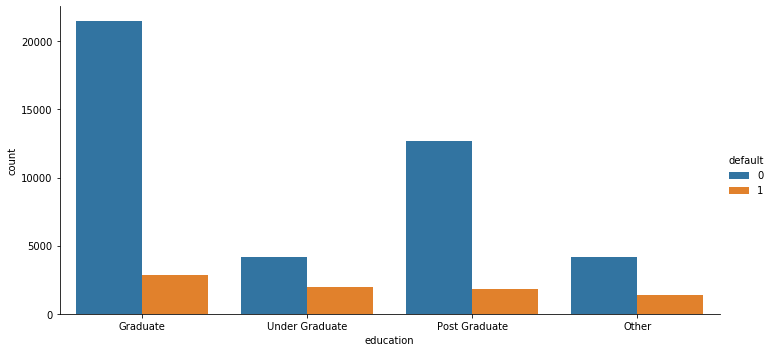

In [8]:
sns.catplot(x="education",hue="default", kind="count", data=data,aspect=2)

In [9]:
edu = data['education'].value_counts()
print("Education       :  Count")
for i in range(len(edu)):
    print(edu.index[i],"\t:",edu.values[i])

Education       :  Count
########################
Graduate 	: 24320
Post Graduate 	: 14545
Under Graduate 	: 6189
Other 	: 5582


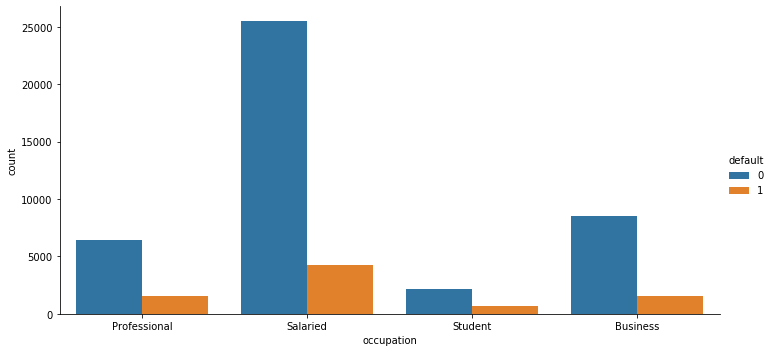

In [10]:
sns.catplot(x="occupation",hue="default", kind="count", data=data,aspect=2)

In [11]:
oc = data['occupation'].value_counts()
print("Occupation       :  Count")
for i in range(len(oc)):
    print(oc.index[i],"\t:",oc.values[i])

Occupation       :  Count
########################
Salaried 	: 29738
Business 	: 10072
Professional 	: 7942
Student 	: 2884


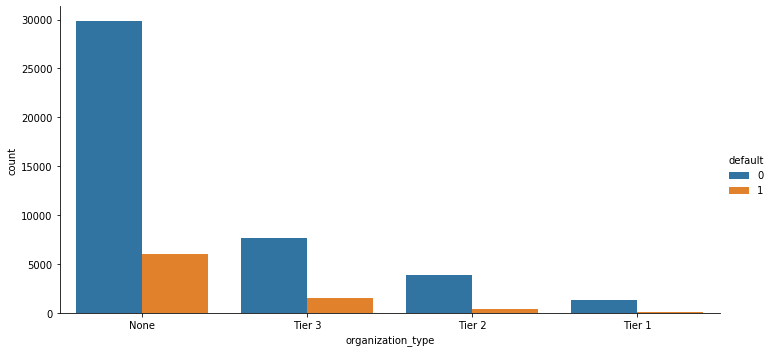

In [12]:
sns.catplot(x="organization_type",hue="default", kind="count", data=data,aspect=2)

In [13]:
org = data['organization_type'].value_counts()
print("Organization type  :  Count")
for i in range(len(org)):
    print(org.index[i],"\t\t   :",org.values[i])

Organization type  :  Count
############################
None 		   : 35884
Tier 3 		   : 9165
Tier 2 		   : 4226
Tier 1 		   : 1361


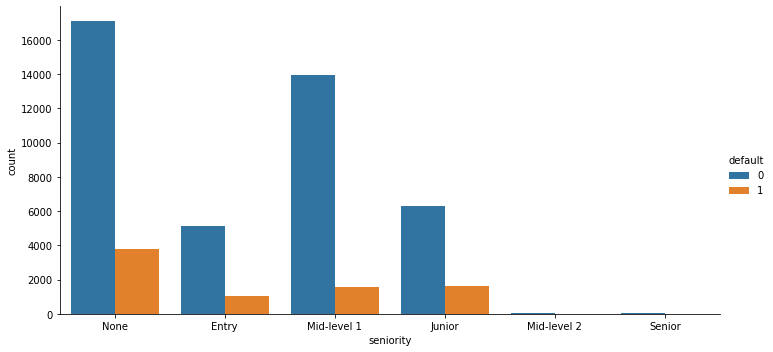

In [14]:
sns.catplot(x="seniority",hue="default", kind="count", data=data,aspect=2)

In [15]:
sr = data['seniority'].value_counts()
print("Seniority  :  Count")
for i in range(len(sr)):
    print(sr.index[i],":",sr.values[i])

Seniority  :  Count
############################
None : 20898
Mid-level 1 : 15565
Junior : 7934
Entry : 6136
Mid-level 2 : 60
Senior : 43


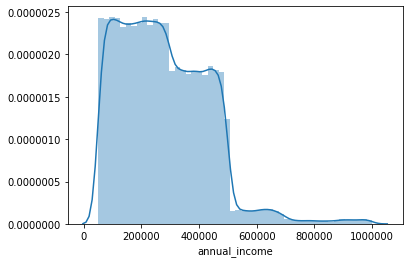

In [16]:
income = data['annual_income']
sns.distplot(income)

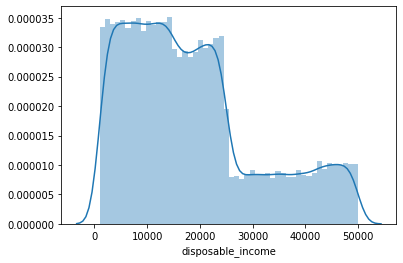

In [17]:
dis_income = data['disposable_income']
sns.distplot(dis_income)

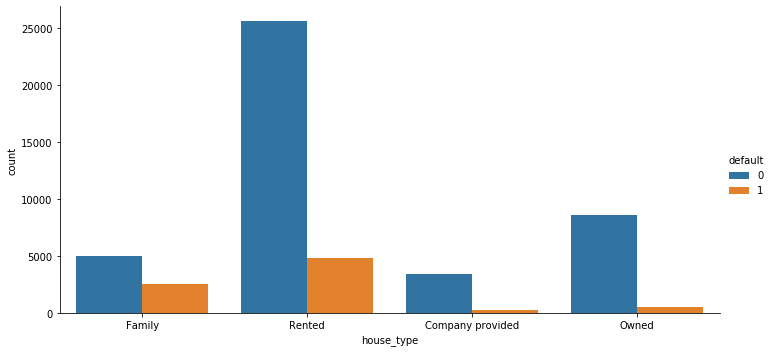

In [18]:
sns.catplot(x="house_type",hue="default", kind="count", data=data,aspect=2)

In [19]:
ht = data['house_type'].value_counts()
print("House type  :  Count")
for i in range(len(ht)):
    print(ht.index[i],":",ht.values[i])

House type  :  Count
############################
Rented : 30411
Owned : 9077
Family : 7506
Company provided : 3642


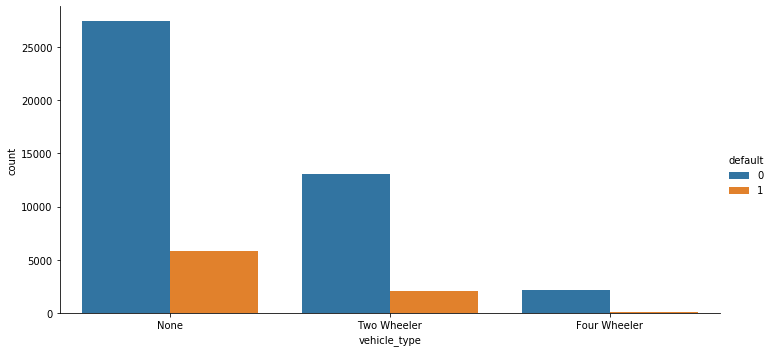

In [20]:
sns.catplot(x="vehicle_type",hue="default", kind="count", data=data,aspect=2)

In [21]:
vt = data['vehicle_type'].value_counts()
print("Vehicle type  :  Count")
for i in range(len(vt)):
    print(vt.index[i],":",vt.values[i])

Vehicle type  :  Count
############################
None : 33301
Two Wheeler : 15101
Four Wheeler : 2234


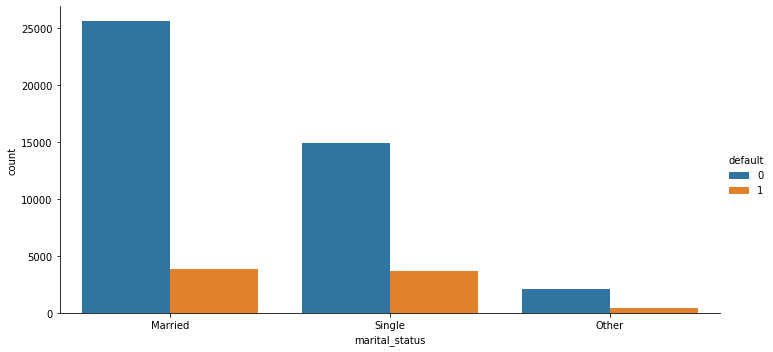

In [22]:
sns.catplot(x="marital_status",hue="default", kind="count", data=data,aspect=2)

In [23]:
mt = data['marital_status'].value_counts()
print("Married status  :  Count")
for i in range(len(mt)):
    print(mt.index[i],":",mt.values[i])

Married status  :  Count
############################
Married : 29539
Single : 18576
Other : 2521


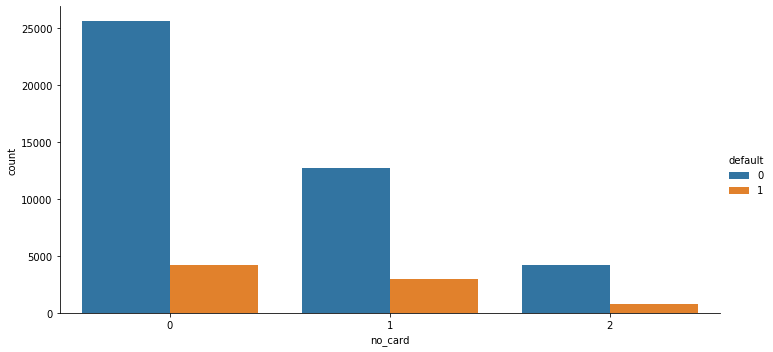

In [24]:
sns.catplot(x="no_card",hue="default", kind="count", data=data,aspect=2)

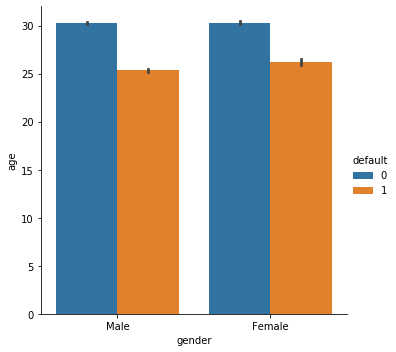

In [25]:
sns.catplot(x="gender", y="age",hue="default", kind="bar",data=data)

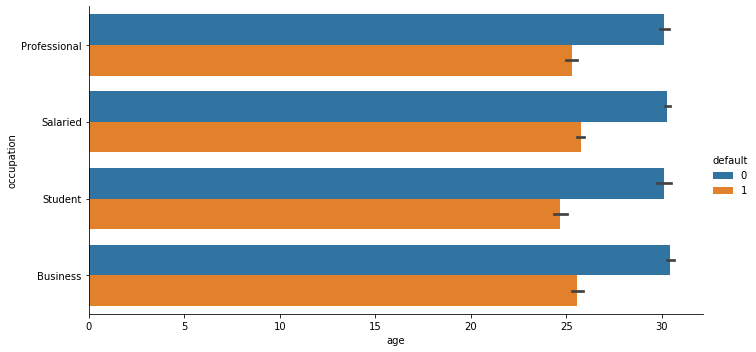

In [26]:
sns.catplot(x="age", y="occupation",hue="default",data=data,kind="bar",aspect=2)

Points with class label -> 0 are =   84.15751639150012 %
Points with class label -> 1 are =   15.842483608499883 %


([<matplotlib.patches.Wedge at 0x7f4a7b997f28>,
 [Text(-0.9715353121196196, 0.5158673640623465, '0'),
  Text(0.9715352879701245, -0.5158674095431959, '1')],
 [Text(-0.529928352065247, 0.2813821985794617, '84.5%'),
  Text(0.5299283388927951, -0.2813822233871977, '15.5%')])

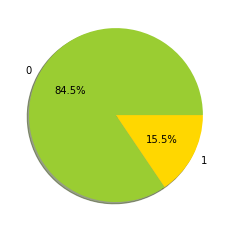

In [27]:
class_label = data['default'].value_counts()
total_points = len(data)
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")
labels = ['0','1']
sizes = [84.15,15.48]
colors = ['yellowgreen', 'gold']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

In [28]:
y = data['default']
x = data.drop(['default'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.3,stratify=y_train)
print("Dimensionality of X_train and y_train :")
print(x_train.values.shape ,y_train.values.shape)
print("Dimensionality of X_test and y_test :")
print(x_test.values.shape ,y_test.values.shape)
print("Dimensionality of X_cv and y_cv :")
print(x_cv.values.shape ,y_cv.values.shape)

Dimensionality of X_train and y_train :
(24811, 12) (24811,)
Dimensionality of X_test and y_test :
(15191, 12) (15191,)
Dimensionality of X_cv and y_cv :
(10634, 12) (10634,)


In [29]:
sc = StandardScaler()
sc.fit(x_train['annual_income'].values.reshape(-1,1))
temp = sc.transform(x_train['annual_income'].values.reshape(-1,1))
x_train['annual_income'] = deepcopy(temp)
temp = sc.transform(x_test['annual_income'].values.reshape(-1,1))
x_test['annual_income'] = deepcopy(temp)
temp = sc.transform(x_cv['annual_income'].values.reshape(-1,1))
x_cv['annual_income'] = deepcopy(temp)

In [30]:
sc = StandardScaler()
sc.fit(x_train['disposable_income'].values.reshape(-1,1))
temp = sc.transform(x_train['disposable_income'].values.reshape(-1,1))
x_train['disposable_income'] = deepcopy(temp)
temp = sc.transform(x_test['disposable_income'].values.reshape(-1,1))
x_test['disposable_income'] = deepcopy(temp)
temp = sc.transform(x_cv['disposable_income'].values.reshape(-1,1))
x_cv['disposable_income'] = deepcopy(temp)

In [31]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['gender'])
temp = label_encoder.transform(x_train['gender'])
x_train['gender'] = deepcopy(temp)
temp = label_encoder.transform(x_test['gender'])
x_test['gender'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['gender'])
x_cv['gender'] = deepcopy(temp)

In [32]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['education'])
temp = label_encoder.transform(x_train['education'])
x_train['education'] = deepcopy(temp)
temp = label_encoder.transform(x_test['education'])
x_test['education'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['education'])
x_cv['education'] = deepcopy(temp)

In [33]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['occupation'])
temp = label_encoder.transform(x_train['occupation'])
x_train['occupation'] = deepcopy(temp)
temp = label_encoder.transform(x_test['occupation'])
x_test['occupation'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['occupation'])
x_cv['occupation'] = deepcopy(temp)

In [34]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['organization_type'])
temp = label_encoder.transform(x_train['organization_type'])
x_train['organization_type'] = deepcopy(temp)
temp = label_encoder.transform(x_test['organization_type'])
x_test['organization_type'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['organization_type'])
x_cv['organization_type'] = deepcopy(temp)

In [35]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['seniority'])
temp = label_encoder.transform(x_train['seniority'])
x_train['seniority'] = deepcopy(temp)
temp = label_encoder.transform(x_test['seniority'])
x_test['seniority'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['seniority'])
x_cv['seniority'] = deepcopy(temp)

In [36]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['house_type'])
temp = label_encoder.transform(x_train['house_type'])
x_train['house_type'] = deepcopy(temp)
temp = label_encoder.transform(x_test['house_type'])
x_test['house_type'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['house_type'])
x_cv['house_type'] = deepcopy(temp)

In [37]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['vehicle_type'])
temp = label_encoder.transform(x_train['vehicle_type'])
x_train['vehicle_type'] = deepcopy(temp)
temp = label_encoder.transform(x_test['vehicle_type'])
x_test['vehicle_type'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['vehicle_type'])
x_cv['vehicle_type'] = deepcopy(temp)

In [38]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['marital_status'])
temp = label_encoder.transform(x_train['marital_status'])
x_train['marital_status'] = deepcopy(temp)
temp = label_encoder.transform(x_test['marital_status'])
x_test['marital_status'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['marital_status'])
x_cv['marital_status'] = deepcopy(temp)

In [39]:
params = {'max_depth': np.arange(3, 10),'criterion' :['gini', 'entropy']}
dt = DecisionTreeClassifier()
best_model = GridSearchCV(dt, params)
best_model.fit(x_train,y_train)
y_pred_cv = best_model.predict_proba(x_cv)[:, 1]
auc_score = roc_auc_score(y_cv, y_pred_cv)

In [40]:
print("The AUC on cross validation set is :",auc_score)

The AUC on cross validation set is : 0.7708964382075413


In [41]:
best_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [42]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=6)
dt.fit(x_train,y_train)
y_pred_train = dt.predict_proba(x_train)[:,1]
y_pred_test = dt.predict_proba(x_test)[:,1]

In [43]:
train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_pred_test)

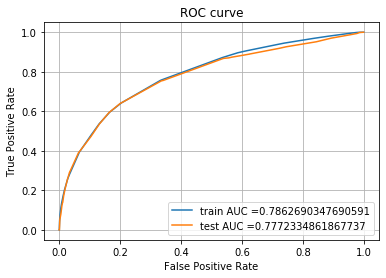

In [44]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [45]:
print("Train accuracy is :",dt.score(x_train,y_train)*100)
print("Test accuracy is  :",dt.score(x_test,y_test)*100)
print("CV accuracy is  :",dt.score(x_cv,y_cv)*100)

Train accuracy is : 85.92962798758616
Test accuracy is  : 85.84688302284246
CV accuracy is  : 85.63099492194847


In [46]:
confusion_matrix_test = pd.DataFrame(confusion_matrix(y_test, dt.predict(x_test)),index=['0','1'],columns=['0','1'])
confusion_matrix_test.style.background_gradient(cmap='Blues')

,0,1
0,12536,248
1,1902,505


In [47]:
fi = dt.feature_importances_
features = x_train.columns
fi_dict = dict(zip(features,fi))
fi_df = pd.DataFrame(fi_dict,index={0})
fi_df

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card
0,0.461003,0.002322,0.137019,0.005434,0.000287,0.006497,0.006121,0.007377,0.319829,0.025383,0.019622,0.009107
